The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.21204258221601346


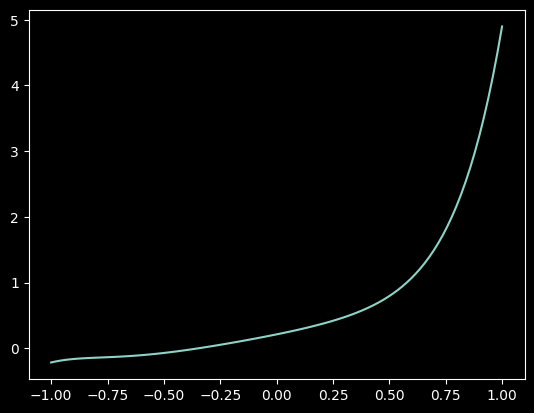

In [14]:
from poly.polynomial import compute_polynomial
%load_ext autoreload
%autoreload 2

import random

import numpy as np
import matplotlib.pyplot as plt

NUMBER_OF_COEFFS = 8
random.seed(42)
coeffs = np.random.random(NUMBER_OF_COEFFS)
print(np.polyval(coeffs, 0))

indices = np.linspace(-1, 1, 10)
values = np.apply_along_axis(lambda x: np.polyval(coeffs, x), 0, indices)

plt.plot(indices, values)
plt.show()

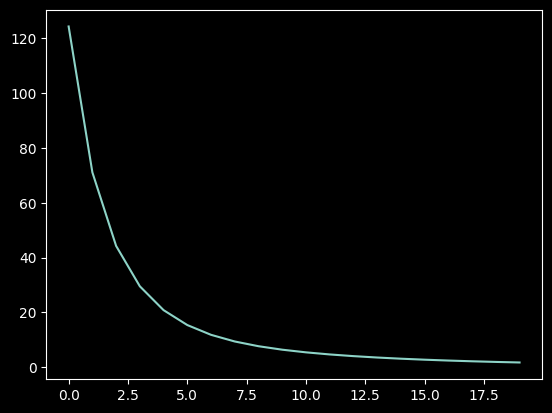

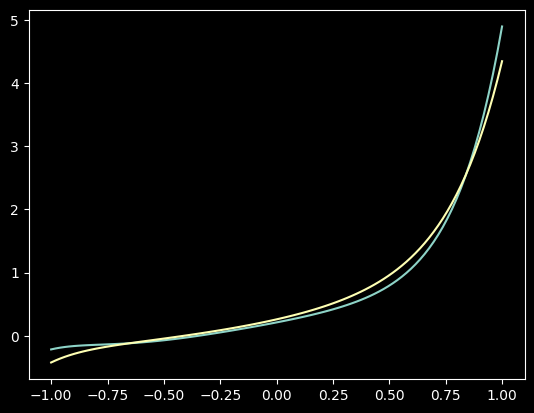

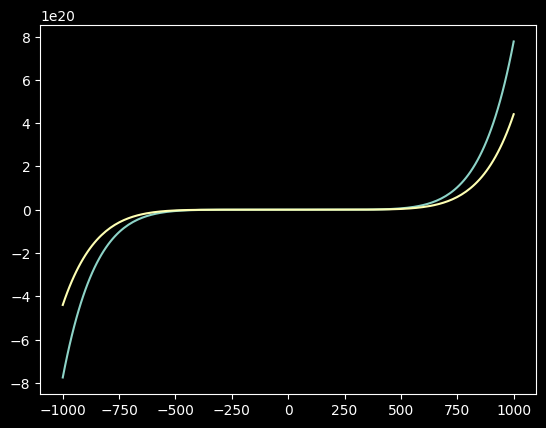

[0.4406838] [0.51418959] [0.51320626] [0.57356079] [0.62175013] [0.61452295] [0.80972172] [0.26054728]
0.77640658344916 0.949762884840363 0.6143743400178925 0.8505293780942338 0.46731328133185424 0.3288763605028233 0.6989472195376947 0.21204258221601346


In [26]:
from loss.mse import mse_loss
from optimizer.SGD import SGD
from automatic_diff_engine.tensor import Tensor

params = [Tensor(0) for i in range(NUMBER_OF_COEFFS)]
optimizer = SGD(
    parameters=params,
    learning_rate = 2e-3
)

losses = []
epochs = 20
for epoch in range(epochs):
    total_loss = 0
    for index in range(len(indices)):
        optimizer.zero_grad()
        x = Tensor(indices[index], requires_grad=False)
        y = Tensor(values[index], requires_grad=False)

        y_pred = compute_polynomial(params, x)
        loss = mse_loss(y_pred, y)
        total_loss += loss.value

        loss.backward()
        optimizer.step()

    losses.append(total_loss)

params_value = [p.value for p in params]



plt.plot(losses)
plt.show()

plt.plot(indices, values)
plt.plot(indices, [np.polyval(params_value, x) for x in indices])
plt.show()

extended_indices = np.linspace(-1000, 1000, 200)
extended_values = np.polyval(coeffs, extended_indices)
plt.plot(extended_indices, extended_values)
plt.plot(extended_indices, [np.polyval(params_value, x) for x in extended_indices])
plt.show()

print(*[p.value for p in params])
print(*coeffs)